# Preprocessing & Machine learning
To be able to compare the performance of the machine learning algorightms that will be used later on several types of datasets, we are going to clean, scale datasets first. Multiple versions of the vision, pixel4x4, pixel8x8, vision-pixel4x4 and vision-pixel8x8 will be created and compared.

### Imports

In [1]:
# Tool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Normalization & Scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer

#Feature Selection
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn import model_selection

# Classifiers & Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Finding parameters
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import itertools

# Export scaler and classifier
from sklearn.externals import joblib

In [2]:
df_v8x8 = pd.read_csv("../dataset-numpy/feature-selection/v8x8.csv").drop(['Unnamed: 0'], axis=1)
df_v8x8_manual1 = pd.read_csv("../dataset-numpy/feature-selection/v8x8-manual1.csv").drop(['Unnamed: 0'], axis=1)
df_v8x8_manual2 = pd.read_csv("../dataset-numpy/feature-selection/v8x8-manual2.csv").drop(['Unnamed: 0'], axis=1)
df_v8x8_sfm = pd.read_csv("../dataset-numpy/feature-selection/v8x8-sfm.csv").drop(['Unnamed: 0'], axis=1)
df_v8x8_kbest = pd.read_csv("../dataset-numpy/feature-selection/v8x8-kbest.csv").drop(['Unnamed: 0'], axis=1)

In [3]:
print(df_v8x8.columns)
print(df_v8x8_manual1.columns)
print(df_v8x8_manual2.columns)
print(df_v8x8_sfm.columns)
print(df_v8x8_kbest.columns)

Index([u'label', u'number_of_holes', u'width', u'height', u'aspect_ratio',
       u'area', u'angle', u'radius', u'contour', u'hull_radius', u'weight0_0',
       u'weight1_0', u'weight2_0', u'weight3_0', u'weight4_0', u'weight5_0',
       u'weight6_0', u'weight7_0', u'weight0_1', u'weight1_1', u'weight2_1',
       u'weight3_1', u'weight4_1', u'weight5_1', u'weight6_1', u'weight7_1',
       u'weight0_2', u'weight1_2', u'weight2_2', u'weight3_2', u'weight4_2',
       u'weight5_2', u'weight6_2', u'weight7_2', u'weight0_3', u'weight1_3',
       u'weight2_3', u'weight3_3', u'weight4_3', u'weight5_3', u'weight6_3',
       u'weight7_3', u'weight0_4', u'weight1_4', u'weight2_4', u'weight3_4',
       u'weight4_4', u'weight5_4', u'weight6_4', u'weight7_4', u'weight0_5',
       u'weight1_5', u'weight2_5', u'weight3_5', u'weight4_5', u'weight5_5',
       u'weight6_5', u'weight7_5', u'weight0_6', u'weight1_6', u'weight2_6',
       u'weight3_6', u'weight4_6', u'weight5_6', u'weight6_6', u'weight7_6',

## Machine learning

### Preprocessing
We need to apply a scaling technique, because most of the machine learning algorithms use Eucledian distance between two datapoints to predict labels for data. If out data contains features highly varying in magnitudes, units and range, these algorithms will only take in the magnitude of features, neglecting the units. The features with high magnitudes will weigh in a lot more in the distance calculations that features with low magnitudes.

Here, we are creating an empty list to add the preprocessing (scalers and normalizers) techniques we are going to use to. 

In [4]:
pre_processing=[]
pre_processing.append(('StandardScaler', StandardScaler()))
pre_processing.append(('Normalizer', Normalizer()))
pre_processing.append(('MinMaxScaler', MinMaxScaler()))

### Algorithms

Create empty lists to be able to save:
- Machine learning models
- Results after training
- Names of machine learning algorithms
- Predict scores

In [5]:
models = []
results = []
names = []
predict = []

- #### K-Nearest Neighbours (KNN)
KNN is essentially classification by finding the most similar datapoints in the training data and making an educated guess based on their classifications. The main-parameter of KNN is 'n_neighbours'. KNN works best on smaller datasets that do not have many features.

- #### Support Vector Machine (SVM)
Support vector machine also called as SVM is a supervised leraning algorithm. It can be used in 2 types, which are SVC and SVR. SVC is support vector classification and SVR i support vector regression. SVM is based on the idea of finding a hyperplane that best divides a dataset into two classes.



- #### Decision Tree
A decision tree can perform both regression and classification tasks. For each attribute in the dataset, the decision tree algorithms forms a node, the most important attribute placed at the root. Evaluating starting from the root node, working our way down. This is continued untill a leaf-node is reached, which contains the outcome of the decision tree (prediction).

- #### Random Forrest
A random forest fits a number of Decision Tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control overfitting. 

In [6]:
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RAND', RandomForestClassifier()))
seed =7
scoring="accuracy"

#### Overview Scaler, Normalizer, Algorithm
Testing normalizer and scaler in combination with machine learning algorightms

In [7]:
def test(data):
    X=data.iloc[:,1:]
    Y=data['label']     
    for test, pre in pre_processing:
        X= pre.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)
        notice="%s:" %(test)
        print(notice)
        print("")
        for name, model in models:
            kfold = model_selection.KFold(n_splits=10, random_state=7)
            cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print("|" + msg)
        print("__________________________")

In [8]:
test(df_v8x8)

StandardScaler:

|KNN: 0.948611 (0.017347)
|SVM: 0.972917 (0.015667)
|CART: 0.852778 (0.038889)
|RAND: 0.939583 (0.015230)
__________________________
Normalizer:

|KNN: 0.938194 (0.018750)
|SVM: 0.915972 (0.024738)
|CART: 0.839583 (0.025694)
|RAND: 0.916667 (0.020127)
__________________________
MinMaxScaler:

|KNN: 0.945139 (0.018750)
|SVM: 0.946528 (0.017854)
|CART: 0.843056 (0.029332)
|RAND: 0.915972 (0.029373)
__________________________


In [9]:
test(df_v8x8_manual1)

StandardScaler:

|KNN: 0.964583 (0.016271)
|SVM: 0.975694 (0.011305)
|CART: 0.851389 (0.027639)
|RAND: 0.940278 (0.014959)
__________________________
Normalizer:

|KNN: 0.963889 (0.012729)
|SVM: 0.937500 (0.018109)
|CART: 0.837500 (0.024689)
|RAND: 0.929167 (0.020787)
__________________________
MinMaxScaler:

|KNN: 0.963194 (0.016739)
|SVM: 0.952083 (0.016565)
|CART: 0.827778 (0.027569)
|RAND: 0.931944 (0.017513)
__________________________


In [10]:
test(df_v8x8_manual2)

StandardScaler:

|KNN: 0.948611 (0.017347)
|SVM: 0.969444 (0.015897)
|CART: 0.849306 (0.034028)
|RAND: 0.940972 (0.026580)
__________________________
Normalizer:

|KNN: 0.938194 (0.018750)
|SVM: 0.923611 (0.023652)
|CART: 0.841667 (0.031335)
|RAND: 0.925000 (0.031944)
__________________________
MinMaxScaler:

|KNN: 0.947917 (0.017081)
|SVM: 0.947222 (0.017067)
|CART: 0.840278 (0.030744)
|RAND: 0.923611 (0.021064)
__________________________


In [11]:
test(df_v8x8_sfm)

StandardScaler:

|KNN: 0.960417 (0.011641)
|SVM: 0.971528 (0.007250)
|CART: 0.852083 (0.040972)
|RAND: 0.944444 (0.015836)
__________________________
Normalizer:

|KNN: 0.956944 (0.009722)
|SVM: 0.931250 (0.031126)
|CART: 0.838889 (0.026860)
|RAND: 0.931944 (0.015775)
__________________________
MinMaxScaler:

|KNN: 0.963194 (0.012442)
|SVM: 0.945139 (0.026976)
|CART: 0.836111 (0.027287)
|RAND: 0.934028 (0.014316)
__________________________


In [12]:
test(df_v8x8_kbest)

StandardScaler:

|KNN: 0.967361 (0.013555)
|SVM: 0.975000 (0.011283)
|CART: 0.845833 (0.045411)
|RAND: 0.934028 (0.018175)
__________________________
Normalizer:

|KNN: 0.964583 (0.018228)
|SVM: 0.929167 (0.025947)
|CART: 0.831250 (0.016739)
|RAND: 0.926389 (0.027812)
__________________________
MinMaxScaler:

|KNN: 0.962500 (0.014633)
|SVM: 0.949306 (0.018904)
|CART: 0.830556 (0.012108)
|RAND: 0.931250 (0.029208)
__________________________


##### Conclusion testing scaler and classifier
- Test df_v8x8 (no fs): StandardScaler + SVM: 0.970833 (0.010668)
- Test df_v8x8_manual1: StandardScaler + SVM: 0.975000 (0.011703)
- Test df_v8x8_manual2: StandardScaler + SVM: 0.970139 (0.009845)
- Test df_v8x8_sfm:     StandardScaler + SVM: 0.970833 (0.013819)
- Test df_v8x8_kbest:   StandardScaler + SVM: 0.970833 (0.011948)

The best combination of scaler and classifiers for our datasets is the StandardScaler and SVM classifier: with an average accuracy of 0.97. Overall, the highest accuracy was reached with the dataset df_v8x8_manual1.

### Applying GridSearchCV
GridSearchCV is an exhaustive search over specified parameter values for an estimator. The paramters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

#### Find a parameter for SVM

In [1]:
# Set up a pipeline
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', SVC()) #step2 - classifier
])

# Split dataset into train set and test set
X=df_v8x8_manual1.iloc[:,1:]
y=df_v8x8_manual1['label'] 
X_train, X_test, y_train, y_test = train_test_split( X ,y, test_size=0.25, random_state=42)

# test parameter 
scores = ['precision', 'recall']
for score in scores:
    print("Tuning hyper-parameters for %s" % score)

    clf = GridSearchCV(pipeline, param_grid = {
    'clf__kernel' : ['linear', 'rbf'],
    'clf__C' : [0.1, 10.]}, cv=5, scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:\n")
    print(clf.best_params_)
    print("\n")
    
    print("Grid scores on development set:\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
 
    print("\nDetailed classification report:\n")
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.\n")

    y_pred =  clf.predict(X_test)
    print(classification_report(y_test, y_pred))

NameError: name 'Pipeline' is not defined

##### Find the best SVM estimator

In [14]:
print(clf.best_estimator_)
print('This is the best score :', clf.best_score_)

Pipeline(memory=None,
     steps=[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=0.99999999999999989, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
('This is the best score :', 0.97645287684107829)


#### Find tje best parameter for KNN

In [15]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

# create a parametergrid dictionary, with parameter name (key) and list of values that should be searched (value)
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# instantiate the grid and fit the grid to the data
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

The Grid object is ready to use 10-fold cross validation as evaluation metric. With this addition, the parameter grid needs to repeat the 10-fold cross validation process 30 times. Each time, the 'n_neighbors' will be given a value from the list
    - GridSearchCV doesn't work on a list
        - GridSearchCv only works on 1 through 30
    - N_jobs=-1 runs computations in parallel

In [16]:
# view the complete results (list of named tuples)
grid.grid_scores_

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.92847, std: 0.02620, params: {'n_neighbors': 1},
 mean: 0.91736, std: 0.01904, params: {'n_neighbors': 2},
 mean: 0.93194, std: 0.01470, params: {'n_neighbors': 3},
 mean: 0.92361, std: 0.01652, params: {'n_neighbors': 4},
 mean: 0.92153, std: 0.01326, params: {'n_neighbors': 5},
 mean: 0.92431, std: 0.01857, params: {'n_neighbors': 6},
 mean: 0.92153, std: 0.01912, params: {'n_neighbors': 7},
 mean: 0.91736, std: 0.01258, params: {'n_neighbors': 8},
 mean: 0.91806, std: 0.01746, params: {'n_neighbors': 9},
 mean: 0.91528, std: 0.01800, params: {'n_neighbors': 10},
 mean: 0.91389, std: 0.02271, params: {'n_neighbors': 11},
 mean: 0.91111, std: 0.02017, params: {'n_neighbors': 12},
 mean: 0.91042, std: 0.02213, params: {'n_neighbors': 13},
 mean: 0.90417, std: 0.02028, params: {'n_neighbors': 14},
 mean: 0.90486, std: 0.02207, params: {'n_neighbors': 15},
 mean: 0.89722, std: 0.02266, params: {'n_neighbors': 16},
 mean: 0.90069, std: 0.02032, params: {'n_neighbors': 17},
 mean:

In [17]:
# examine the first tuple by slicing the list and selecting its elements
print('Parameters')
print(grid.grid_scores_[0].parameters)

# Array of 10 accuracy scores during 10-fold cv using the parameters
print('\n CV Validation Score')
print(grid.grid_scores_[0].cv_validation_scores)

# Mean of the 10 scores
print('\nMean Validation Score')
print(grid.grid_scores_[0].mean_validation_score)

Parameters
{'n_neighbors': 1}

 CV Validation Score
[ 0.90728477  0.93333333  0.93793103  0.9020979   0.90140845  0.9084507
  0.9084507   0.94366197  0.97887324  0.96453901]

Mean Validation Score
0.928472222222


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [18]:
# creating a list of the mean scores only using list comprehension to loop through grid.grid_scores
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.92847222222222225, 0.91736111111111107, 0.93194444444444446, 0.92361111111111116, 0.92152777777777772, 0.9243055555555556, 0.92152777777777772, 0.91736111111111107, 0.91805555555555551, 0.91527777777777775, 0.91388888888888886, 0.91111111111111109, 0.91041666666666665, 0.90416666666666667, 0.90486111111111112, 0.89722222222222225, 0.90069444444444446, 0.89652777777777781, 0.89027777777777772, 0.88958333333333328, 0.88749999999999996, 0.88194444444444442, 0.88194444444444442, 0.87986111111111109, 0.88124999999999998, 0.87916666666666665, 0.87777777777777777, 0.875, 0.87430555555555556, 0.86944444444444446]


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Text(0,0.5,'Cross-Validated Accuracy')

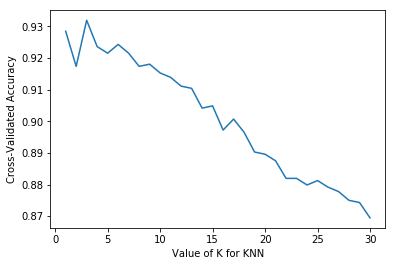

In [19]:
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [20]:
# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.931944444444
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


### Compare Confusion matrix per algorithm
To evaluate the accuracy of the classification predictions done on our (test)dataset, we will plot the confusion matrix. The true label of the number is the y-axis, the predicted label is the x-axis. The prediction is done right when the true label equals the predicted label.

In [21]:
def plot_confusion_matrix(cm, classes):
#     print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

##### Plot SVM confusion matrix

Accuracy of the best classifier after CV is 96.875%


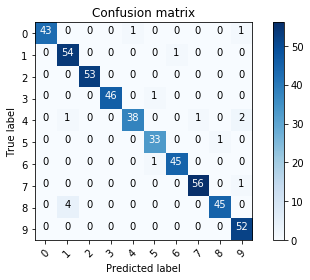

In [22]:
# the final accuracy after gridsearch CV:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

# Confusion matrix of gridsearch model
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(0,10))
plt.show()

##### Plot KNN confusion matrix

Accuracy of the best classifier after CV is 90.833%


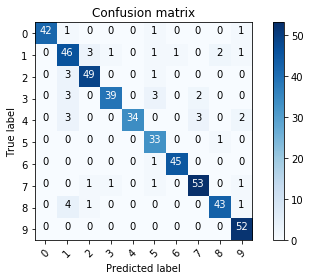

In [23]:
y_predict_1 = grid.predict(X_test)
accuracy_1 = accuracy_score(y_test,y_predict_1)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy_1*100))

# Confusion matrix of gridsearch model
cnf_matrix = confusion_matrix(y_test, y_predict_1)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(0,10))
plt.show()

#### Conclusion

Comparing SVM and KNN after applying GridSearchCV to find the best hyperparameter, we can conclude that the SVM is the best suitable classifier for our assigment, with an accuracy of 96.875%. 

## Exporting Scaler and Classifier
Using our answer from 'finding the best SVM estimator', since the standardscaler and SVM are the best model for our assignment.

This is the final model of digits recognition, which is made by Sang and Nicky. This is the result after the testing phase. SVM is the chosen algorithm and the StandartScaler() for pre-processing phase.
- Dataset: The chosen features consists of vision based features and 8x8 grid pixel features, using the manual feature selection(1) method explained in file _3. Clean data & Preprocessing Analysis_.
- Pre-processing: Normalizing our data using the StandardScaler()
- Classifier: SVM with the parameter (C=0.99999999999999989, kernel='rbf, gamma='auto'), which was proved in the testing phase because with this parameter we will have the highest accuracy

In [24]:
joblib.dump(clf.best_estimator_, '../classifiers/grid_scale_classifiers.joblib') 

['../classifiers/grid_scale_classifiers.joblib']